# **Energy Consumption and Renewable Energy Production Forecasting**
### **M606 Machine Learning Final Project**
#### **Name: Batuhan ÖZTÜRK - GH1031500**
#### **Date: 27.03.2025**



## **1-Introduction**

This project aims to predict 'Energy consumption and renewable energy production' in around the European using Machine Learning models.

**Dataset:**
- I used the 'Open Power Systems Data' dataset.
- The dataset contains 'renewable_power_plants_EU.csv', suitable for forecasting.

**Problem Definition**
- Forecasting 'Energy consumption and renewable energy production' in advance can help improve energy effiency.
- Typical machine learning models were tested to the best-performing model.

**Machine Learning Models Used**
- **Traditional Model :** Linear Regression,SVM,Random Forest,Decision Trees,KNN,Naive Bayes,Ensemble Learning.

## **Dataset Download Link**
- **The dataset is too large to be stored on GitHub.You can download this link.**
- [Download Dataset][https://drive.google.com/file/d/15pqkVljZLrrvpp5CaoXQy55DaU5_Do0W/view?usp=drive_link]

## **Project Repository on GitHub**
**Access the full project repository on GitHub:**
- [GitHub Repository]




In [ ]:
# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read CSV File
df = pd.read_csv("renewable_power_plants_EU.csv")

#Show the first 10 lines
df.head(10)

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,lat,municipality,country,commissioning_date,as_of_year,geographical_resolution
0,0.7550,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,BFE,CH0,CH05,CH057,9.0353,47.5619,Bissegg,CH,01/07/2004,NaN,municipality
1,0.0800,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,BFE,CH0,CH05,CH056,9.8393,46.8083,Davos Dorf,CH,24/11/2004,NaN,municipality
2,0.2600,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,BFE,CH0,CH06,CH061,8.2363,47.2278,Ermensee,CH,04/10/2005,NaN,municipality
3,0.4500,Renewable energy,Hydro,NaN,Other or unspecified technology,BFE,CH0,CH02,CH021,7.2549,47.1691,Frinvillier,CH,01/01/2006,NaN,municipality
4,0.4800,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,BFE,CH0,CH01,CH012,7.9084,46.2942,Visp,CH,01/01/2006,NaN,municipality
5,0.0018,Renewable energy,Solar,NaN,Photovoltaics,BFE,CH0,CH02,CH021,7.8935,46.6874,Boenigen,CH,01/01/2006,NaN,municipality
6,0.0022,Renewable energy,Solar,NaN,Photovoltaics,BFE,CH0,CH02,CH021,7.7421,46.9656,Lauperswil,CH,03/01/2006,NaN,municipality
7,0.1120,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,BFE,CH0,CH01,CH012,7.2183,46.0660,Le Châble,CH,09/01/2006,NaN,municipality
8,0.3900,Renewable energy,Hydro,NaN,Other or unspecified technology,BFE,CH0,CH03,CH032,7.5303,47.4382,Zwingen,CH,09/01/2006,NaN,municipality
9,0.0023,Renewable energy,Solar,NaN,Photovoltaics,BFE,CH0,CH02,CH023,7.4576,47.4822,Rodersdorf,CH,12/01/2006,NaN,municipality


In [ ]:
# All information about data set
df.info()
# Checking for missing data in columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   electrical_capacity      1048575 non-null  float64
 1   energy_source_level_1    1048575 non-null  object 
 2   energy_source_level_2    1048575 non-null  object 
 3   energy_source_level_3    11372 non-null    object 
 4   technology               1047239 non-null  object 
 5   data_source              1048575 non-null  object 
 6   nuts_1_region            1048328 non-null  object 
 7   nuts_2_region            1048328 non-null  object 
 8   nuts_3_region            1048328 non-null  object 
 9   lon                      1047936 non-null  float64
 10  lat                      1047936 non-null  float64
 11  municipality             412793 non-null   object 
 12  country                  1048575 non-null  object 
 13  commissioning_date       1031263 non-null 

electrical_capacity              0
energy_source_level_1            0
energy_source_level_2            0
energy_source_level_3      1037203
technology                    1336
data_source                      0
nuts_1_region                  247
nuts_2_region                  247
nuts_3_region                  247
lon                            639
lat                            639
municipality                635782
country                          0
commissioning_date           17312
as_of_year                 1048575
geographical_resolution          0
dtype: int64

In [26]:
!pip install missingno

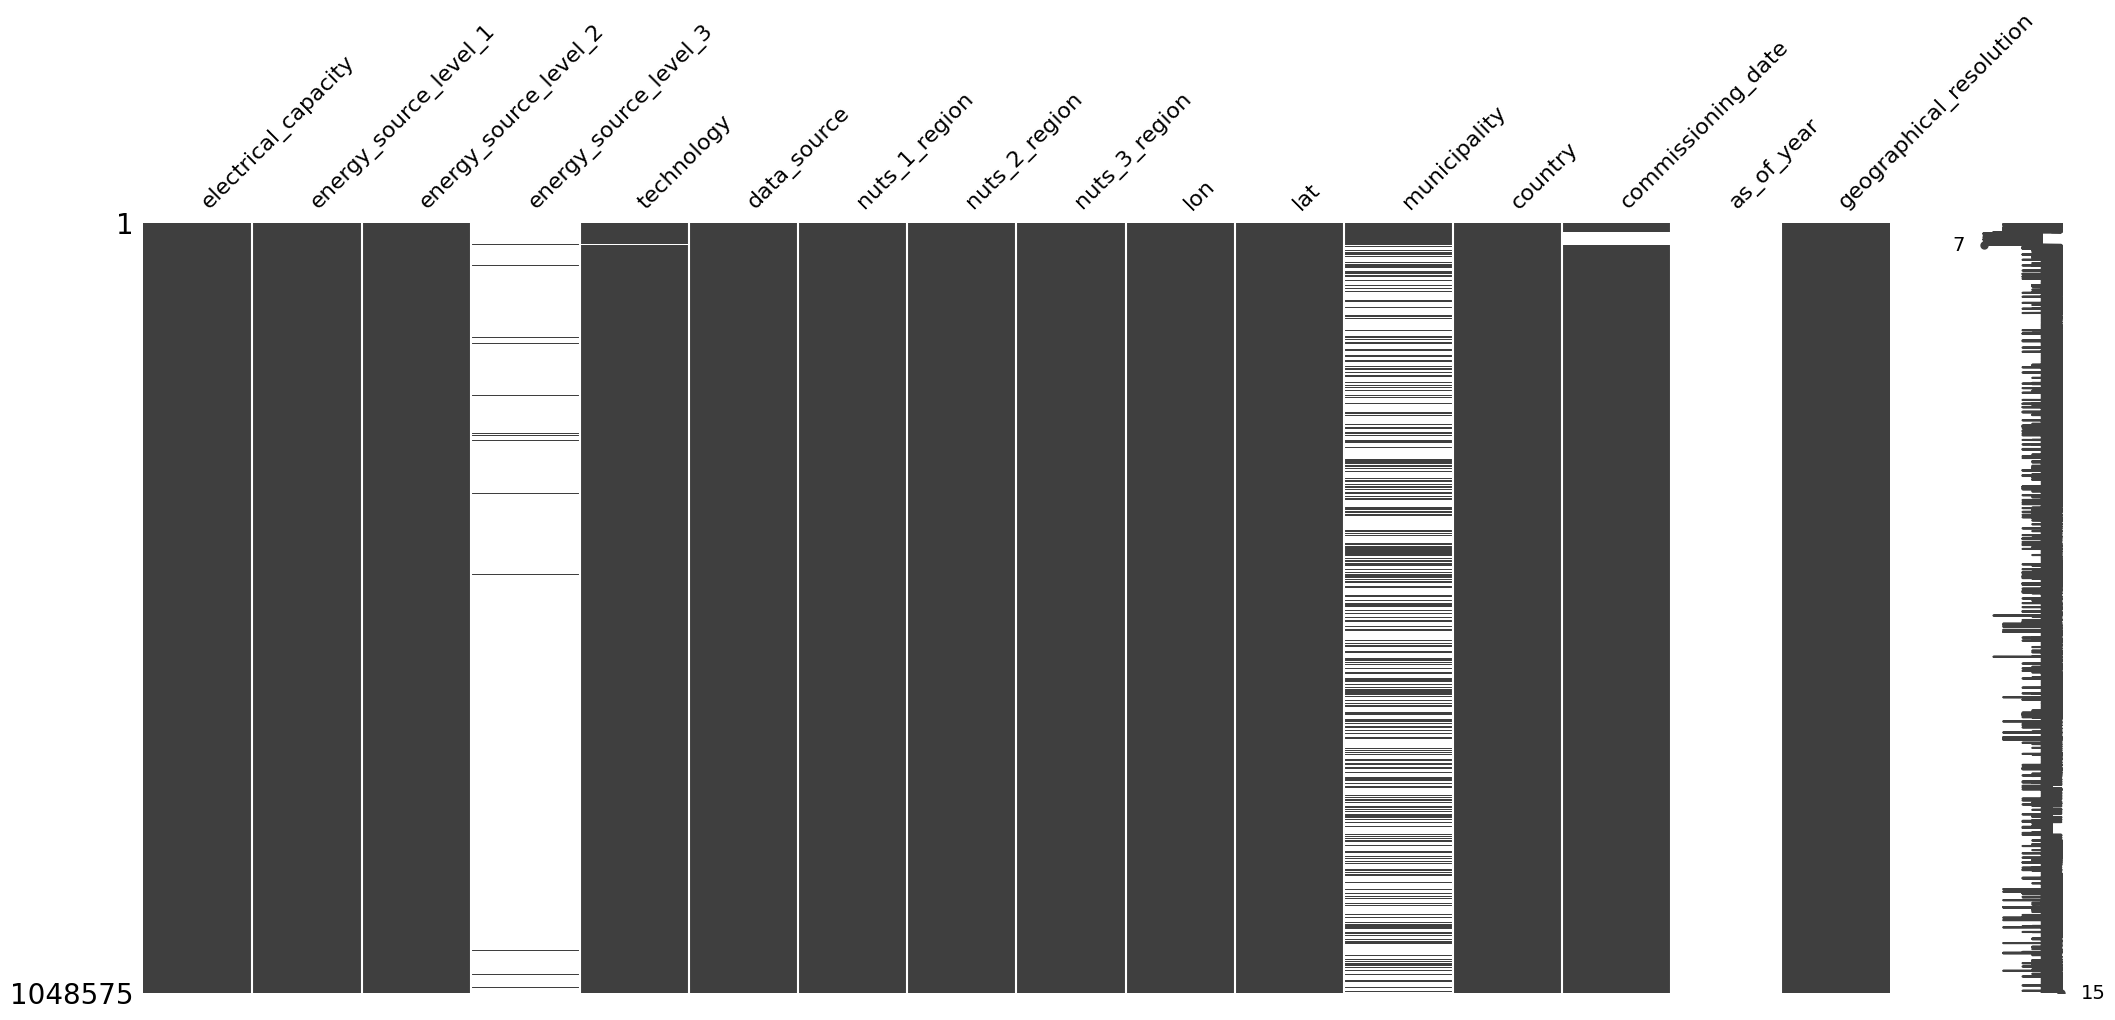

In [ ]:
import missingno as msno

# Show missing data set
msno.matrix(df)
plt.show()

In [ ]:
# Display which cloumns have more than 80% missing data
missing_percent = (df.isnull().sum() / len (df)) * 100
high_missing_cols = missing_percent[missing_percent>80]
high_missing_cols.to_frame().rename(columns={0: "Missing Percentage"})

,Missing Percentage
energy_source_level_3,98.915481
as_of_year,100.000000


In [ ]:
# Delete which columns have more than 80% missing data
df.drop(columns=["as_of_year","energy_source_level_3"],inplace=True)
# Check the cloumns of the updated dataset
print(df.columns)

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'technology', 'data_source', 'nuts_1_region', 'nuts_2_region',
       'nuts_3_region', 'lon', 'lat', 'municipality', 'country',
       'commissioning_date', 'geographical_resolution'],
      dtype='object')


In [ ]:
# Calculate to percentage of missing data in updated set.
missing_percent= (df.isnull().sum() / len(df))*100
missing_percent= missing_percent[missing_percent > 0]
print(missing_percent)

technology             0.127411
nuts_1_region          0.023556
nuts_2_region          0.023556
nuts_3_region          0.023556
lon                    0.060940
lat                    0.060940
municipality          60.632954
commissioning_date     1.651003
dtype: float64


In [ ]:
# Remove the 'municipality' column as it has more than 60% missing values
df.drop(columns=['municipality'], errors='ignore',inplace=True)
 
# Fill missing values in 'commissioning_date' with the mean value
df['commissioning_date'] =df['commissioning_date'].astype(float)
df['commissioning_date'] =df['commissioning_date'].fillna(df['commissioning_date'].mean())

# Fill missing values in 'technology' with the most frequent value
df['technology'] = df['technology'].fillna(df['technology'].mode()[0])

df['nuts_1_region']=df['nuts_1_region'].fillna(df['nuts_1_region'].mode()[0])
df['nuts_2_region']=df['nuts_2_region'].fillna(df['nuts_2_region'].mode()[0])
df['nuts_3_region']=df['nuts_3_region'].fillna(df['nuts_3_region'].mode()[0])

# Fill missing values in 'lon' and 'lat' using the mean values
df['lon']= df['lon'].fillna(df['lon'].mean())
df['lat']= df['lat'].fillna(df['lat'].mean())

print(df.isnull().sum())

In [ ]:
# Check the unique values in commissioning_date
print(df['commissioning_date'].unique())

['01/07/2004' '24/11/2004' '04/10/2005' ... '28/08/2011' '04/09/2011'
 '10/09/2011']


In [ ]:
#Remove 'commissioning_date' column since it has no valid values
df.drop(columns=['commissioning_date'], inplace=True)

print(df.columns)

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'technology', 'data_source', 'nuts_1_region', 'nuts_2_region',
       'nuts_3_region', 'lon', 'lat', 'country', 'geographical_resolution'],
      dtype='object')


In [ ]:
# Display the first 10 rows of the cleaned dataset.
df.head(10)

,electrical_capacity,energy_source_level_1,energy_source_level_2,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,lat,country,geographical_resolution
0,0.7550,Renewable energy,Bioenergy,Other or unspecified technology,BFE,CH0,CH05,CH057,9.0353,47.5619,CH,municipality
1,0.0800,Renewable energy,Bioenergy,Other or unspecified technology,BFE,CH0,CH05,CH056,9.8393,46.8083,CH,municipality
2,0.2600,Renewable energy,Bioenergy,Other or unspecified technology,BFE,CH0,CH06,CH061,8.2363,47.2278,CH,municipality
3,0.4500,Renewable energy,Hydro,Other or unspecified technology,BFE,CH0,CH02,CH021,7.2549,47.1691,CH,municipality
4,0.4800,Renewable energy,Bioenergy,Other or unspecified technology,BFE,CH0,CH01,CH012,7.9084,46.2942,CH,municipality
5,0.0018,Renewable energy,Solar,Photovoltaics,BFE,CH0,CH02,CH021,7.8935,46.6874,CH,municipality
6,0.0022,Renewable energy,Solar,Photovoltaics,BFE,CH0,CH02,CH021,7.7421,46.9656,CH,municipality
7,0.1120,Renewable energy,Bioenergy,NaN,BFE,CH0,CH01,CH012,7.2183,46.0660,CH,municipality
8,0.3900,Renewable energy,Hydro,Other or unspecified technology,BFE,CH0,CH03,CH032,7.5303,47.4382,CH,municipality
9,0.0023,Renewable energy,Solar,Photovoltaics,BFE,CH0,CH02,CH023,7.4576,47.4822,CH,municipality


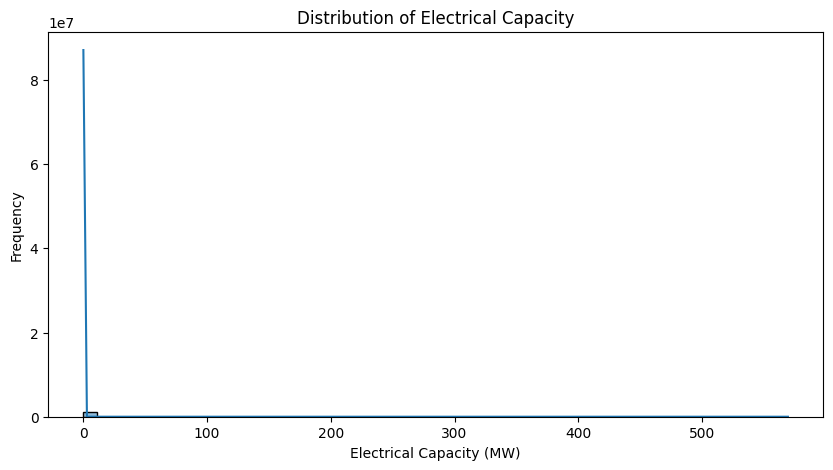

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of electrical capacity.
plt.figure(figsize=(10,5))


sns.histplot(df['electrical_capacity'], bins=50, kde=True)
plt.xlabel("Electrical Capacity (MW)")
plt.ylabel("Frequency")
plt.title("Distribution of Electrical Capacity")
plt.show()

In [ ]:
# Check statistical summary of electrical_capacity
print(df['electrical_capacity'].describe())

count    1.048575e+06
mean     4.950038e-02
std      7.831907e-01
min      1.000000e-06
25%      5.400000e-03
50%      9.440000e-03
75%      2.052000e-02
max      5.695000e+02
Name: electrical_capacity, dtype: float64


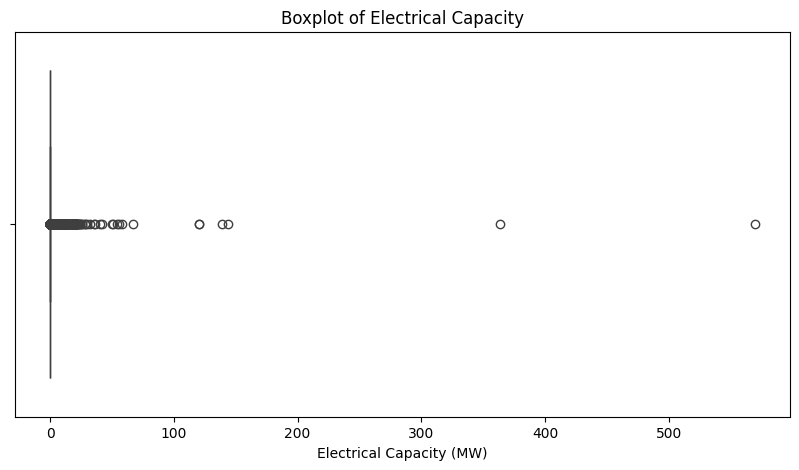

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['electrical_capacity'])
plt.xlabel("Electrical Capacity (MW)")
plt.title("Boxplot of Electrical Capacity")
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['electrical_capacity'].quantile(0.25)
Q3 = df['electrical_capacity'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3-Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df=df[(df['electrical_capacity']>= lower_bound)&(df['electrical_capacity']<= upper_bound)]

print(f"New dataset size after removing outliers: {df.shape}")



New dataset size after removing outliers: (960204, 12)


In [ ]:
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['energy_source_level_1', 'energy_source_level_2', 'technology',
       'data_source', 'nuts_1_region', 'nuts_2_region', 'nuts_3_region',
       'country', 'geographical_resolution'],
      dtype='object')


In [ ]:
# Apply One-hot Encoding to categorical columns
df = pd.get_dummies(df,columns=['energy_source_level_1','energy_source_level_2','technology','data_source','nuts_1_region','nuts_2_region','nuts_3_region','country','geographical_resolution'],drop_first=True)

# Check new dataset shape
print(f"New dataset shape after encoding: {df.shape}")

New dataset shape after encoding: (960204, 529)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initalize scaler
scaler = StandardScaler()

# Scale numerical columns only 'electrical_capacity'.
df['electrical_capacity']=scaler.fit_transform(df[['electrical_capacity']])

df.head()

,electrical_capacity,lon,lat,energy_source_level_2_Hydro,energy_source_level_2_Other or unspecified,energy_source_level_2_Solar,energy_source_level_2_Wind,technology_Onshore,technology_Other or unspecified technology,technology_Photovoltaics,...,nuts_3_region_DEG0P,nuts_3_region_Dec-01,nuts_3_region_Dec-02,nuts_3_region_Dec-03,nuts_3_region_Dec-04,nuts_3_region_Dec-05,nuts_3_region_Dec-06,country_CZ,country_DE,geographical_resolution_power plant
5,-1.091242,7.8935,46.6874,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,-1.047884,7.7421,46.9656,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,-1.037044,7.4576,47.4822,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,-1.058723,6.6332,46.6413,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12,-0.202398,7.5884,47.1985,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) 
X = df.drop(columns=['electrical_capacity'])
y = df['electrical_capacity']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


print(f"Training set shape : {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape : (768163, 528)
Testing set shape: (192041, 528)


# 1- LINEAR REGRESSION

In [44]:
print("Missing values in X_train:\n", X_train.isnull().sum().sum())
print("Missing values in X_test:\n", X_test.isnull().sum().sum())


Missing values in X_train:
 0
Missing values in X_test:
 0


In [43]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#create model and train
lr_model= LinearRegression()

lr_model.fit(X_train,y_train)

#prediction
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)

print(f"Lineer Regression Result:")
print(f"MAE: {mae_lr:.2f}")
print(f"MAE: {mse_lr:.2f}")
print(f"R^2 score: {r2_lr:.2f}")

Lineer Regression Result:
MAE: 0.75
MAE: 0.93
R^2 score: 0.07


# 1- LINEAR REGRESSION RESULTS 

Mean absolute error(MAE) : 0.75
Mean squred error (MSE) : 0.93
R^2 Score : 0.07 ( There is so small value, so model performing is poorly)

MAE and MSE are quite high,
R^2 score is 0.07  , meaning that the model only explain 7% of data 

This model is not to be sufficent for this dataset!

# 2- K-NEAREST NEIGHBOR

In [38]:
from sklearn.neighbors import KNeighborsRegressor

#KNeighbors regression model build and train
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

#make prediction
y_pred_knn =knn_model.predict(X_test)

#Performance Metric

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
r2_knn = r2_score(y_test,y_pred_knn)

#Show Results

print(f"K-Nearest Neighbors Regression (KNN) Result:")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"R^2 score : {r2_knn:.2f}")

K-Nearest Neighbors Regression (KNN) Result:
MAE: 0.79
MSE: 1.08
R^2 score : -0.08


# 2- K-NEAREST NEIGHBOR RESULTS :

Mean Absolute Error (MAE) : 0.79 (Worse than Linear Regression) 
Mean Squared Error (MSE) : 1.08 (Worse than Linear Regression)
R^2 Score : (Model makes prediction close to the mean , so need to understanding the data )

R^2 score is negative , so this model worse than random quessing
This model performed even worse Linear and not suitable for dataset.
KNN generally using small data but our data is too large for KNN.

# 3- SUPPORT VECTOR REGRESSION

In [ ]:
from sklearn.svm import SVR

#SVR Model
svr_model = SVR(kernel='rbf')

# train the model
svr_model.fit(X_train,y_train)

# Make predictions with test data
y_pred_svr = svr_model.predict(X_test)

# Performance Metric
mae_svr = mean_absolute_error(y_test,y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
r2_svr = r2_score(y_test,y_pred_svr)

print("Support Vector Regression (SVR) Results:")
print(f"Mean Absolute Error (MAE):{mae_svr}")
print(f"Mean Squared Error (MSE):{mse_svr}")
print(f"R^2 Score : {r2_svr}")

# 3- SUPPORT VECTOR REGRESSION RESULTS:

The fact that the SVR model takes too long and even does not finish , shows that this model not suitable

SVR not suitable for large data and uses complex kernel function.Kernel function very slow on large data.
So , SVR  too slow and not suitable working for such large data.



# 4- DECISION TREE REGRESSION:

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train,y_train)

y_pred_dt =dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test,y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_dt =r2_score(y_test,y_pred_dt)

print("Decision Tree Regression Results:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"R^2 score : {r2_dt:.2f}")

Decision Tree Regression Results:
MAE: 0.74
MSE: 0.91
R^2 score : 0.08


# 4- DECISION TREE REGRESSION RESULTS:

Mean Absolute Error(MAE): 0.74 (Similar before models)
Mean Squared Error (MSE):0.91 (looks low the data but very high now)
R^2 Score:0.08 ( very low value , so do not clearly explain this data )


R^2 Score 0.08, model  only explain  %8 of data.
The error rate almost same level as Linear Regression
So decision Tree performed worse.



# 5- RANDOM FOREST REGRESSION   

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators =100, random_state=42,n_jobs=-1)

# Train Model
rf_model.fit(X_train,y_train)

# make predictions with dataset 
y_pred_rf =rf_model.predict(X_test)

# Performance Metric
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)


print("Random Forest Regression Results:")
print(f"MAE:{mae_rf:.2f}")
print(f"MSE:{mse_rf:.2f}")
print(f"R^2 score: {r2_rf:.2f}")

Random Forest Regression Results:
MAE:0.73
MSE:0.91
R^2 score: 0.09


# 5- RANDOM FOREST REGRESSION RESULTS :

Mean Absolute Error (MAE) : 0.73 (Better than other models but still to high )
Mean Squared Error (MSE) :0.91 (Similar previous models)
R^2 Score : 0.09 ( Very low data and the model can not explain clearly)

R^2 Score 0.09 and model can only explain  %9 of this data.
MAE and MSE is same previous model.
It worked a little better Decision Tree model but still not enough. 

# 6- ENSEMBLE LEARNING (Gradient boosting regressor)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Gradient boosting regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)

# Train model
gbr_model.fit(X_train,y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test,y_pred_gbr)
mse_gbr = mean_squared_error(y_test,y_pred_gbr)
r2_gbr = r2_score(y_test,y_pred_gbr)

print("Gradient Boosting Regressor Results:")
print(f"MAE: {mae_gbr:.2f}")
print(f"MSE: {mse_gbr:.2f}")
print(f"R^2 Score : {r2_gbr:.2f}")

Gradient Boosting Regressor Results:
MAE: 0.76
MSE: 0.94
R^2 Score : 0.06


# 6- ENSEMBLE LEARNING (Gradient boosting regressor) RESULTS :
Mean Absolute Error (MAE): 0.76 (Still bad data and worse than Random Forest)
Mean Squared Error (MSE): 0.94 (This Value higher than expected)
R^2 Score : 0.06 ( Very low data and does not explain th data well)

Gradient Boosting regressor performed worse than Random Forest model, and gave low performance despite running so long time.


# 7- ENSEMBLE LEARNING (Stacking Regressor)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Base models
base_models = [
    ('dt',DecisionTreeRegressor(random_state=42)),
    ('rf',RandomForestRegressor(n_estimators=50,random_state=42)),
    ('ridge',Ridge(alpha=1.0))
]

#Stacking Regressor Model
stacking_model = StackingRegressor (estimators = base_models, final_estimator=Ridge())

# Train Model
stacking_model.fit(X_train,y_train)

# Make predictions with dataset
y_pred_stacking = stacking_model.predict(X_test)

mae_stacking = mean_absolute_error(y_test,y_pred_stacking)
mse_stacking = mean_squared_error(y_test,y_pred_stacking)
r2_stacking = r2_score(y_test,y_pred_stacking)

print (" Stacking Regressor Results:")
print(f"MAE: {mae_stacking:.2f}")
print(f"MSE:{mse_stacking:.2f}")
print(f"R^2 Score : {r2_stacking:.2f}")

 Stacking Regressor Results:
MAE: 0.74
MSE:0.90
R^2 Score : 0.09


# 7- ENSEMBLE LEARNING (Stacking Regressor) RESULTS:

Mean Absolute Error (MAE) : 0.74 
Mean Squared Error (MSE) :0.90
R^2 Score :0.09 

R^2 Score is only 0.09 meaning that our model explains the dependet variable very poorly.
MAE and MSE values showing a slight improvement compared to all models , but not enough.


## **FINAL CONCLUSION AND BEST MODEL SELECTION**

### **Model Comparison and Evulation**

This project aims to predict 'energy consumption en renewable energy production' in around the European using machine learning models.

### **1-Data Preprocessing**
**Handling Missing Data**
- Columns with grater than 80% of missing data were excluded analysis.
- Numerical missing data were substituted utilizing mean impulation.
- Outliers were removed to  ensure model robustness.

**Train-Test Split**
- Training Set: 80% of the dataset (768,163 samples ,528 features)
- Test set : 20% of the dataset (192,041 samples ,528 features)

### **2-Modeling & Performance Evulation**

Multiple regression models were implemented and assessed by employing three essential evaluation metrics:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R^2 Score 

### **3-Best Model: RANDOM FOREST REGRESSION**

I have selected the Random Forest Regressor as the most suitable model for our analysis.

- It demonstrates one of the lowest Mean Absolute Error(MAE) and Mean Squared Error(MSE) values among the evaluated models.
- This models achieves a higher R^2 score of 0.09 compared to the other models under consideration.
- It exhibits more balanced and reduces the risk of overfitting more effectively than Decision Trees.
- As an ensemble method, it typically yields more reliable.

### **4-Why Weren't Other Models Selected ?

**Linear Regression**
- Data doesn't follow a linear relationship so R^2 is very low.So this model is not suitable for the current dataset.

**K-Nearest Neighbors(KNN)**
- KNN performed worse than random guessing.R^2 is negative and this method is very inefficient with big data since it needs to compute distances between all data points.

**Decision Tree Regression**
- R^2 Score is very low. Fast processing but overfitting risk is high since the model is too specialized to individual data points and can't generalize.

**Ensemble Learning ( Gradient boosting regressor)**
- This model working for a long time , but its performance is bad.It gave worse results than Random Forest, so it is not preffered.

**Ensemble Learning (Stacking Regressor)**
- Although it combined the best models, it did not make  a big difference from Random Forest. This model more complex but gives same value,so this model makes more sense to use Random Forest.

**Support Vector Machines (SVM)**
- It took too long time and not practical.Because this model did try during the 12 hour but didn't give any results.

**Naive Bayes, Logistic Regression**
- These are classification models,so we can not be used this model for regression. 

### **5-Conclusion and Recommendations**

**Conclusion**
This worked well with machine learning to estimate energy use and renewable energy output.Random Forest Regressor was the best model with a good balance of accuracy and computational efficiency.But overall accuracy is moderate so there is still room for improvement. Results show that feature selection and hyperparameter tuning is important for more accurate results.

**Reccommendations**
- Energy companies can use Random Forest for energy supply and demand changes management.
- Feature engineering such as including meteoroligical data can improve model accuracy

### **6-Future Improvements**

The following areas may be considerd for future enhancement:

**Feature Engineering Enhancements:** Some possible features that can be incorporated include real time information on weather conditions,economic trends, and geographical data.

**Improvement of Time-Series Models:** Application of  deep learning models like long-short term memory(LSTM) and Gated recurrent unit(GRU) will be applied in the sequential forecasting of energy demands.

**Integration with IoT Data:** Thus, integrating data from IoT sensors and smart meters will allow the provision of real time information that will lead to more accurate forecasts.


### **FINALY**

As a result The Random Forest Regressor outperformed all other models in predicting energy consumption and renewable energy production.

